In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression


In [2]:
df= pd.read_csv('student_por.csv')

df.columns = [str.replace('Fedu', 'Father_Education') for str in df.columns]
df.columns = [str.replace('Medu', 'Mother_Education') for str in df.columns]
df.columns = [str.replace('Mjob', 'Mother_Job') for str in df.columns]
df.columns = [str.replace('Fjob', 'Father_Job') for str in df.columns]
df.columns = [str.replace('Pstatus', 'Parental_Status') for str in df.columns]
df.columns = [str.replace('famrel', 'Relevance_of_Family') for str in df.columns]
df.columns = [str.replace('goout', 'Social_Life') for str in df.columns]
df.columns = [str.replace('Dalc', 'Weekday_Alcohol_Consumption') for str in df.columns]
df.columns = [str.replace('Walc', 'Weekend_Alcohol_Consumption') for str in df.columns]
df.columns = [str.replace('paid', 'Paid_Extra_Classes') for str in df.columns]
df.columns = [str.replace('famsup', 'Family_Support') for str in df.columns]
df.columns = [str.replace('nursery', 'Attended_Nursery_School') for str in df.columns]
df.columns = [str.replace('higher', 'Plans_for_Higher_Education') for str in df.columns]
df.columns = [str.replace('G1', '1st_Term_Grade') for str in df.columns]
df.columns = [str.replace('G2', '2nd_Term_Grade') for str in df.columns]
df.columns = [str.replace('G3', 'Final_Grade') for str in df.columns]

df.head()

,school,sex,age,address,famsize,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Relevance_of_Family,freetime,Social_Life,Weekday_Alcohol_Consumption,Weekend_Alcohol_Consumption,health,absences,1st_Term_Grade,2nd_Term_Grade,Final_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.loc[df['school'] == 'GP', 'school'] = 0
df.loc[df['school'] == 'MS', 'school'] = 1
df.loc[df['sex'] == 'M', 'sex'] = 0
df.loc[df['sex'] == 'F', 'sex'] = 1
df.loc[df['address'] == 'U', 'address'] = 0
df.loc[df['address'] == 'R', 'address'] = 1
df.loc[df['famsize'] == 'LE3', 'famsize'] = 0
df.loc[df['famsize'] == 'GT3', 'famsize'] = 1
df.loc[df['Parental_Status'] == 'T', 'Parental_Status'] = 0
df.loc[df['Parental_Status'] == 'A', 'Parental_Status'] = 1
df.loc[df['Mother_Job'] == 'teacher', 'Mother_Job'] = 0
df.loc[df['Mother_Job'] == 'health', 'Mother_Job'] = 1
df.loc[df['Mother_Job'] == 'services', 'Mother_Job'] = 2
df.loc[df['Mother_Job'] == 'at_home', 'Mother_Job'] = 3
df.loc[df['Mother_Job'] == 'other', 'Mother_Job'] = 4
df.loc[df['Father_Job'] == 'teacher', 'Father_Job'] = 0
df.loc[df['Father_Job'] == 'health', 'Father_Job'] = 1
df.loc[df['Father_Job'] == 'services', 'Father_Job'] = 2
df.loc[df['Father_Job'] == 'at_home', 'Father_Job'] = 3
df.loc[df['Father_Job'] == 'other', 'Father_Job'] = 4
df.loc[df['reason'] == 'home', 'reason'] = 0
df.loc[df['reason'] == 'reputation', 'reason'] = 1
df.loc[df['reason'] == 'course', 'reason'] = 2
df.loc[df['reason'] == 'other', 'reason'] = 3
df.loc[df['guardian'] == 'mother', 'guardian'] = 0
df.loc[df['guardian'] == 'father', 'guardian'] = 1
df.loc[df['guardian'] == 'other', 'guardian'] = 2
df.loc[df['schoolsup'] == 'no', 'schoolsup'] = 0
df.loc[df['schoolsup'] == 'yes', 'schoolsup'] = 1
df.loc[df['Family_Support'] == 'no', 'Family_Support'] = 0
df.loc[df['Family_Support'] == 'yes', 'Family_Support'] = 1
df.loc[df['Paid_Extra_Classes'] == 'no', 'Paid_Extra_Classes'] = 0
df.loc[df['Paid_Extra_Classes'] == 'yes', 'Paid_Extra_Classes'] = 1
df.loc[df['activities'] == 'no', 'activities'] = 0
df.loc[df['activities'] == 'yes', 'activities'] = 1
df.loc[df['Attended_Nursery_School'] == 'no', 'Attended_Nursery_School'] = 0
df.loc[df['Attended_Nursery_School'] == 'yes', 'Attended_Nursery_School'] = 1
df.loc[df['Plans_for_Higher_Education'] == 'no', 'Plans_for_Higher_Education'] = 0
df.loc[df['Plans_for_Higher_Education'] == 'yes', 'Plans_for_Higher_Education'] = 1
df.loc[df['internet'] == 'no', 'internet'] = 0
df.loc[df['internet'] == 'yes', 'internet'] = 1
df.loc[df['romantic'] == 'no', 'romantic'] = 0
df.loc[df['romantic'] == 'yes', 'romantic'] = 1

df


,school,sex,age,address,famsize,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Relevance_of_Family,freetime,Social_Life,Weekday_Alcohol_Consumption,Weekend_Alcohol_Consumption,health,absences,1st_Term_Grade,2nd_Term_Grade,Final_Grade
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,10
645,1,1,18,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,16
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,9
647,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,10


Int64Index([1, 0], dtype='int64')


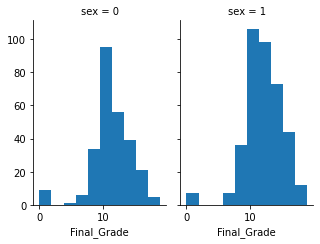

In [4]:
gender_count = df.sex.value_counts().index
print(gender_count)
g = sns.FacetGrid(df, col='sex', height = 3.5, aspect = 0.65)
g.map(plt.hist, "Final_Grade") 

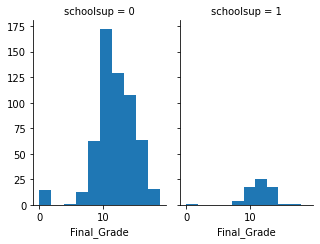

In [5]:
g = sns.FacetGrid(df, col='schoolsup', height = 3.5, aspect = 0.65)
g.map(plt.hist, "Final_Grade") 

In [6]:
df.groupby('sex').agg({'Final_Grade': np.average})

,Final_Grade
sex,
0,11.406015
1,12.253264


In [7]:
df.groupby('schoolsup').agg({'Final_Grade': np.average})

,Final_Grade
schoolsup,
0,11.979346
1,11.279412


In [8]:
from scipy import stats
maleData=df[df['sex']==0]
femaleData=df[df['sex']==1]
popMean=df.groupby('sex').agg({'Final_Grade': np.average})
tset, pval = stats.ttest_1samp(maleData.Final_Grade,popMean)
if pval[1] < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [9]:
maleData=df[df['schoolsup']==0] 
femaleData=df[df['schoolsup']==1]
popMean=df.groupby('schoolsup').agg({'Final_Grade': np.average})
tset, pval = stats.ttest_1samp(maleData.Final_Grade,popMean)
if pval[1] < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")
#*

 we are rejecting null hypothesis


In [10]:
df['school']=pd.to_numeric(df.school)
df['sex']=pd.to_numeric(df.sex)
df['address']=pd.to_numeric(df.address)
df['famsize']=pd.to_numeric(df.famsize)
df['Parental_Status']=pd.to_numeric(df.Parental_Status)
df['Mother_Job']=pd.to_numeric(df.Mother_Job)
df['Father_Job']=pd.to_numeric(df.Father_Job)
df['reason']=pd.to_numeric(df.reason)
df['guardian']=pd.to_numeric(df.guardian)
df['schoolsup']=pd.to_numeric(df.schoolsup)
df['Family_Support']=pd.to_numeric(df.Family_Support)
df['Paid_Extra_Classes']=pd.to_numeric(df.Paid_Extra_Classes)
df['activities']=pd.to_numeric(df.activities)
df['Attended_Nursery_School']=pd.to_numeric(df.Attended_Nursery_School)
df['Plans_for_Higher_Education']=pd.to_numeric(df.Plans_for_Higher_Education)
df['internet']=pd.to_numeric(df.internet)
df['romantic']=pd.to_numeric(df.romantic)
lr = df.copy()

In [11]:
df = df.corr()
df = df.drop('school', axis=1)
df = df.drop('sex', axis=1)
df = df.drop('age', axis=1)
df = df.drop('address', axis=1)
df = df.drop('famsize', axis=1)
df = df.drop('Parental_Status', axis=1)
df = df.drop('Mother_Education', axis=1)
df = df.drop('Father_Education', axis=1)
df = df.drop('Mother_Job', axis=1)
df = df.drop('Father_Job', axis=1)
df = df.drop('reason', axis=1)
df = df.drop('guardian', axis=1)
df = df.drop('schoolsup', axis=1)
df = df.drop('Family_Support', axis=1)
df = df.drop('Paid_Extra_Classes', axis=1)
df = df.drop('activities', axis=1)
df = df.drop('Attended_Nursery_School', axis=1)
df = df.drop('Plans_for_Higher_Education', axis=1)
df = df.drop('internet', axis=1)
df = df.drop('romantic', axis=1)
df = df.drop('traveltime', axis=1)
df = df.drop('studytime', axis=1)
df = df.drop('failures', axis=1)
df = df.drop('Relevance_of_Family', axis=1)
df = df.drop('freetime', axis=1)
df = df.drop('Social_Life', axis=1)
df = df.drop('Weekday_Alcohol_Consumption', axis=1)
df = df.drop('Weekend_Alcohol_Consumption', axis=1)
df = df.drop('health', axis=1)
df = df.drop('absences', axis=1)
df = df.drop('1st_Term_Grade', axis=0)
df = df.drop('2nd_Term_Grade', axis=0)
df = df.drop('Final_Grade', axis=0)
df

,1st_Term_Grade,2nd_Term_Grade,Final_Grade
school,-0.292626,-0.269776,-0.284294
sex,0.104109,0.104005,0.129077
age,-0.174322,-0.107119,-0.106505
address,-0.157127,-0.154600,-0.167637
famsize,-0.047230,-0.038891,-0.045016
Parental_Status,-0.015251,-0.018689,0.000754
Mother_Education,0.260472,0.264035,0.240151
Father_Education,0.217501,0.225139,0.211800
Mother_Job,-0.169317,-0.158552,-0.166790
Father_Job,-0.093530,-0.085288,-0.065454


Text(0.5, 1.0, 'Correlation Heat Map')

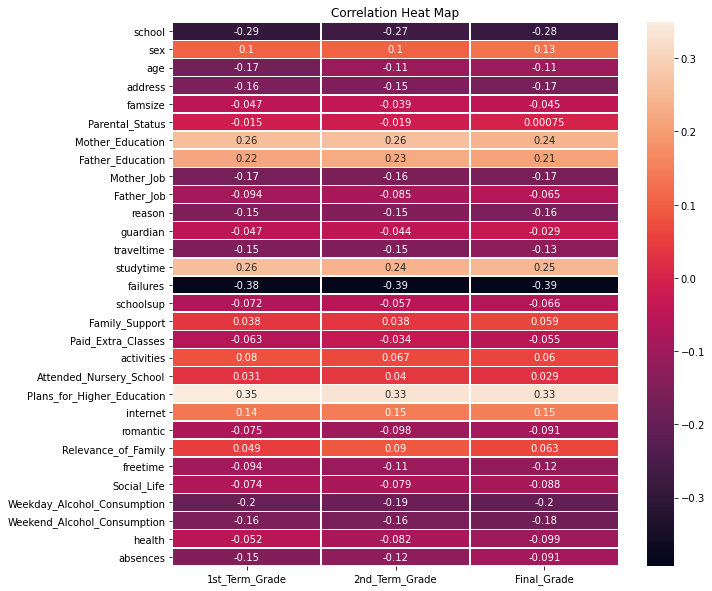

In [12]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
plt.title("Correlation Heat Map")

What the data means:
From the heat map above we see that Mother_Education, Father_Education, Studytime, and Plans_For_Higher_Education have the highest positive correlation. This means that as the vale for the category above increases it is likely the performance of the student will be improved.

Mother_Education: The student is more likely to have improved grades if their mother has more education.
Father_Education: The student is more likely to have improved grades if their father has more education.
Studytime: The student is more likely to have improved grades if they increase their studytime.
Plans_for_Higher_Education: The student is more likely to have improved grades if they plan on obtaining a higher education.

The heatmap above also shows data with negative correlations which means as they increase doing a certain behaivor it is more likely to decrease their overall grade. These data columns include: failures and Weekday_Alcohol_Consumption.

Failures: The student is more likely to have lower grades if they have failed preivous courses.
SchoolsUp: Students who are more likely to be in extra educational suppourt are more likely to have lower grades.
Social Life: Studens who go out with friends are more likely to have lower grades than those who do not.

In [13]:
lr.head()

,school,sex,age,address,famsize,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Relevance_of_Family,freetime,Social_Life,Weekday_Alcohol_Consumption,Weekend_Alcohol_Consumption,health,absences,1st_Term_Grade,2nd_Term_Grade,Final_Grade
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13


In [14]:
X = lr[['1st_Term_Grade', '2nd_Term_Grade']].values
y = lr.failures
y

0      0
1      0
2      0
3      0
4      0
      ..
644    1
645    0
646    0
647    0
648    0
Name: failures, Length: 649, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Text(0.5, 1.0, 'Portugese Test Data')

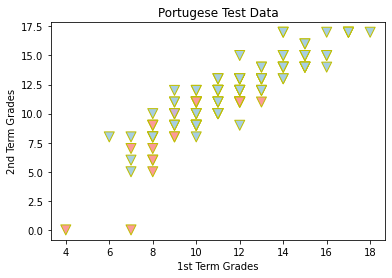

In [16]:
# Plot the TESTING points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='y', marker='v' ,s=100 ,cmap=plt.cm.Paired)
plt.xlabel('1st Term Grades')
plt.ylabel('2nd Term Grades')
plt.title('Portugese Test Data')

Text(0.5, 1.0, 'Portugese Train Data')

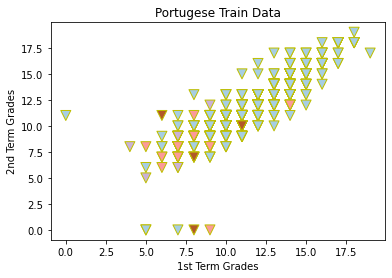

In [17]:
# Plot the TESTING points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='y', marker='v' ,s=100 ,cmap=plt.cm.Paired)
plt.xlabel('1st Term Grades')
plt.ylabel('2nd Term Grades')
plt.title('Portugese Train Data')